# Edge Detection in OpenCV

## 01. Import and Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2, sys


# Manually specify the path to the project directory
project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)

from mansoor import Repeatable

### Create and Instance Of Repeater

In [2]:
r = Repeatable(300,300, base_path='../../data/images/') # It have functions that we need to do Repeatedly

## 02. `cv2.Canny()` Function Parameters

## 03. `cv2.Sobel()` Function for Edge Detection


- **`image`** (`numpy.ndarray`):  
  The input image on which edge detection is performed. It must be in grayscale (single-channel), as the Canny algorithm operates on intensity gradients in the image. If the image is in color, it must first be converted to grayscale using `cv2.cvtColor()`.

- **`threshold1`** (`int`):  
  The lower threshold for the hysteresis procedure. Pixels with intensity gradients lower than this value are discarded. This parameter helps filter out noise and non-relevant edges. It should be smaller than `threshold2`.

- **`threshold2`** (`int`):  
  The upper threshold for the hysteresis procedure. Pixels with intensity gradients greater than this value are considered edges. Pixels with gradients between `threshold1` and `threshold2` are kept only if they are connected to strong edges (i.e., gradients higher than `threshold2`).

- **`apertureSize`** (`int`, default=3):  
  The size of the Sobel kernel used to calculate the gradient of the image. It defines the window used for gradient estimation. The size must be an odd integer (e.g., 3, 5, 7). Larger values result in more smoothing and can help reduce noise, but may blur edges.

- **`L2gradient`** (`bool`, default=False):  
  If `True`, the function uses the L2 norm (Euclidean distance) to calculate the gradient magnitude, which is more accurate. If `False` (default), it uses the L1 norm (sum of absolute gradients). The L2 norm tends to be more computationally expensive but produces more precise gradient me#asurements.

### Summary
- **`threshold1`** and **`threshold2`** define the gradient range for edge detection. A higher difference between these values reduces the number of edges detected.
- **`apertureSize`** determines the size of the Sobel kernel for gradient computation. Larger values increase smoothing but may reduce edge sharpness.
- **`L2gradient`** toggles the accuracy of gradient magnitude calculation, with the L2 norm providing more precise results at a com#putational cost.

### When Does Canny Give Better Results?

Canny edge detection tends to give better results in the following cases:

- **Clear and Sharp Edges**:  
  Canny performs well when there are clear, well-defined edges in the image, where the intensity gradient changes sharply.
  
- **Noise-Free or Pre-Processed Images**:  
  Canny works best when the image is relatively clean or pre-processed with noise reduction techniques (e.g., Gaussian blur). It is sensitive to noise, so if the image contains a lot of noise, it might detect spurious edges. Pre-processing with smoothing can improve the result.

- **High Contrast**:  
  In images with high contrast between foreground and background, the algorithm is more likely to detect strong edges and produce clear, continuous boundaries.

- **Well-Tuned Thresholds**:  
  Properly tuning `threshold1` and `threshold2` based on the image's gradient characteristics ensures optimal edge detection. Too high a threshold will miss faint edges, while too low a threshold may result in detecting noise.

In summary, Canny edge detection gives the best results when the image has strong, distinct edges and minimal noise. It excels in well-contrasted images, especially when fine-tuned for the specific characteristics of the image.
alculation methods.


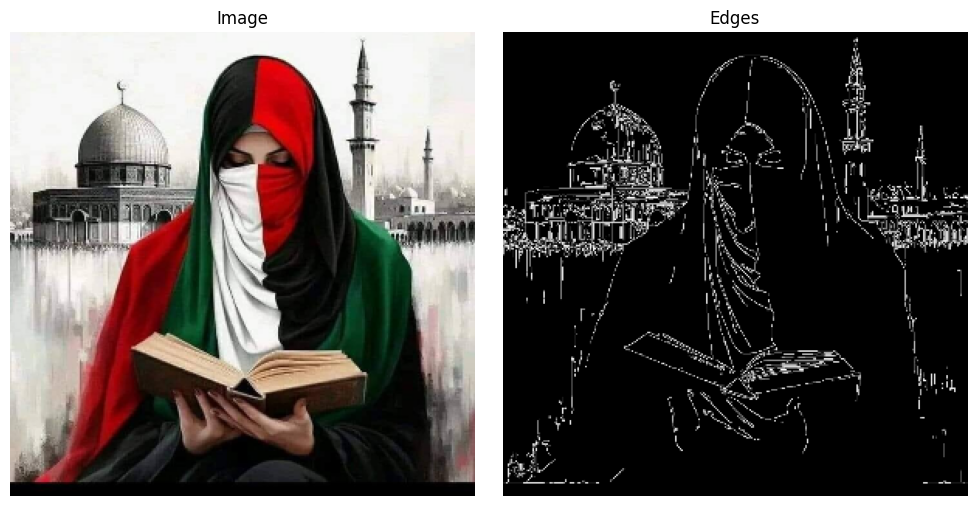

In [3]:
img = r.load_image('1.jpg')
new = cv2.Canny(img, 100, 200, apertureSize=3, L2gradient=True)

r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

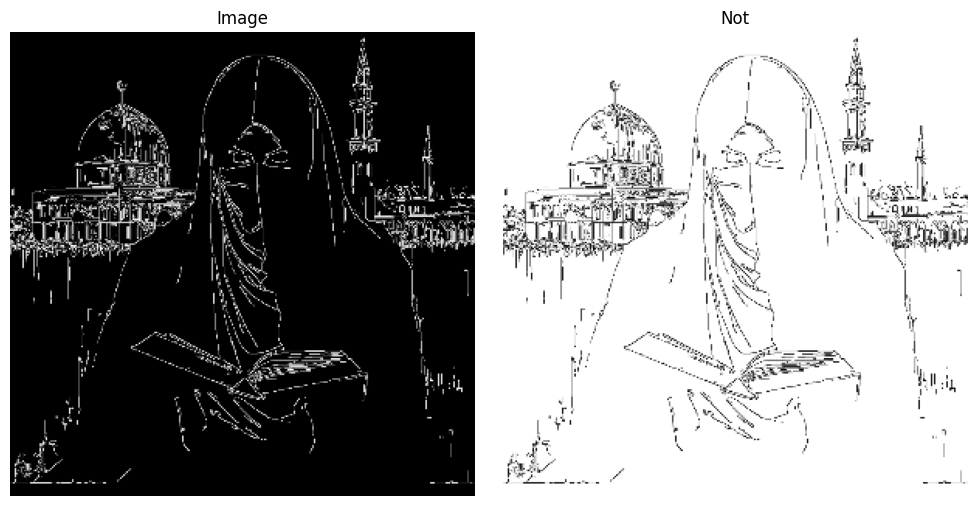

In [4]:
n = cv2.bitwise_not(new)
r.show_multiple_images(images=(new, n), titles=('Image', 'Not'), cols=2)

#### Test it on a image with clear Edges

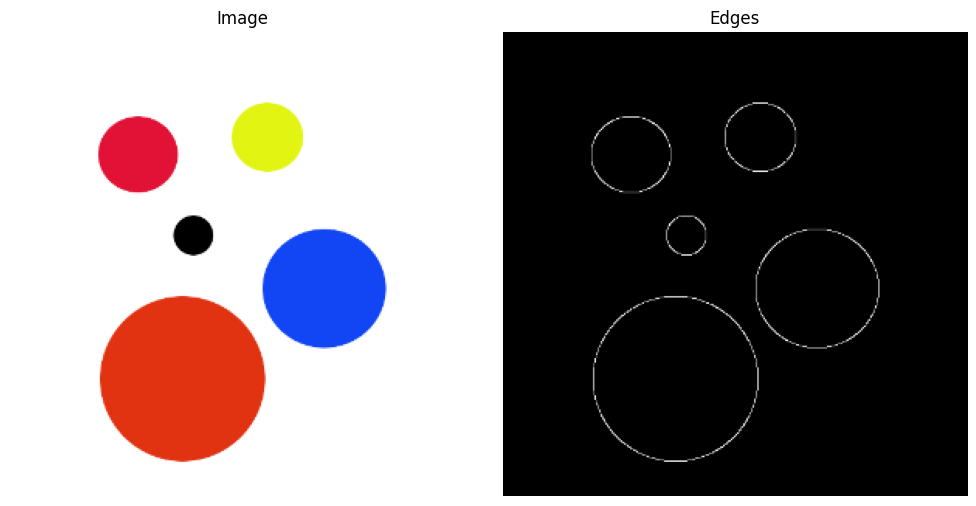

In [5]:
img = r.load_image('circles.jpg')
new = cv2.Canny(img, 200, 250)
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

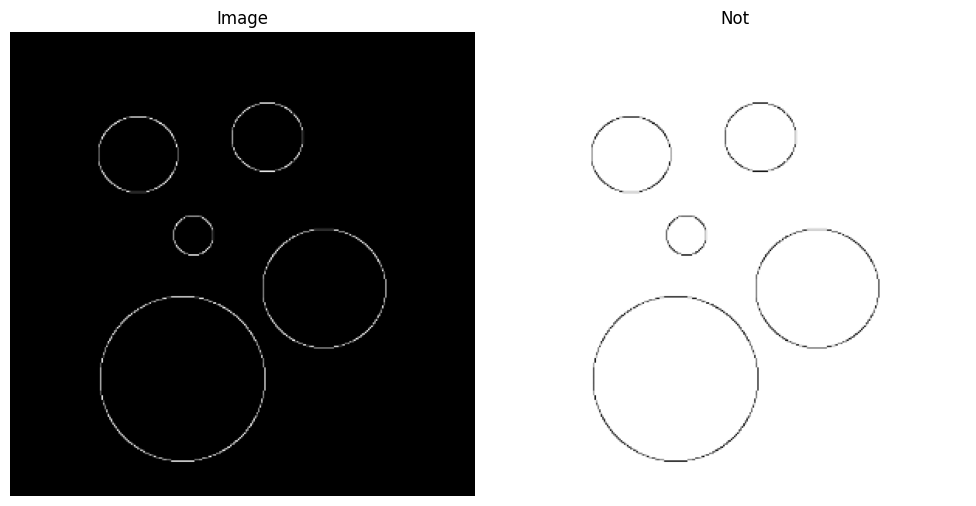

In [6]:
n = cv2.bitwise_not(new)
r.show_multiple_images(images=(new, n), titles=('Image', 'Not'), cols=2)

##### Summary of Parameters for `cv2.Canny()`

| **Parameter**   | **Description**                                                                                              |
|-----------------|--------------------------------------------------------------------------------------------------------------|
| `image`         | The input image (grayscale, single-channel).                                                                 |
| `threshold1`    | The lower threshold for the hysteresis procedure. It is used to classify edges as strong or weak.            |
| `threshold2`    | The upper threshold for the hysteresis procedure. It is used to classify edges as strong, weak, or non-edges. |
| `edges`         | The output image to store the result (optional). If not provided, a new image is created.                    |
| `apertureSize`  | The size of the Sobel kernel used to compute gradients. Must be 3, 5, or 7. Default is 3.                    |
| `L2gradient`    | A flag indicating whether to use the more accurate L2 norm for edge detection. If `True`, it uses `sqrt(dx^2 + dy^2)`. Default is `False` (uses L1 norm, `|dx| + |dy|`). |


The `cv2.Sobel()` function in OpenCV is used for edge detection by computing the **first-order derivatives** of the image. These derivatives represent the rate of change in intensity along specific directions (horizontal and vertical), allowing the detection of edges in the image.

### Syntax

**`cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)`**

### Explanation of Parameters

- **`src`** (`numpy.ndarray`):  
  The input image on which Sobel edge detection is applied. It should be in grayscale (single-channel), as the Sobel operator works on intensity gradients. If the image is in color, convert it to grayscale first.

- **`ddepth`** (`int`):  
  The desired depth of the output image. Typically, this is set to `-1`, which means the output image will have the same depth as the input image (`src`). Other possible values are `cv2.CV_8U`, `cv2.CV_16S`, or `cv2.CV_64F`.

- **`dx`** (`int`):  
  The order of the derivative in the x-direction (horizontal). 
  - `dx = 1` calculates the first derivative in the horizontal direction.
  - `dx = 0` means no derivative in the x-direction.

- **`dy`** (`int`):  
  The order of the derivative in the y-direction (vertical).
  - `dy = 1` calculates the first derivative in the vertical direction.
  - `dy = 0` means no derivative in the y-direction.

- **`ksize`** (`int`, default=3):  
  The size of the kernel used to compute the derivatives. It must be an odd integer (e.g., 3, 5, 7). Larger values smooth the image more but can blur fine details.

- **`scale`** (`float`, default=1):  
  A scaling factor for the computed derivative. It allows you to adjust the intensity of the output image.

- **`delta`** (`float`, default=0):  
  A value added to the result of the derivative computation. This is useful for shifting or adjusting the output.

- **`borderType`** (`int`, default=`cv2.BORDER_DEFAULT`):  
  This parameter defines how the border of the image is handled when computing the derivatives. The default is `cv2.BORDER_DEFAULT`, but other options like `cv2.BORDER_REPLICATE` or `cv2.BORDER_REFLECT` can also be used.

### Summary of Sobel Edge Detection:
- **`dx` and `dy`**: Control which direction the gradient is calculated. Typically, `dx=1` and `dy=0` detect horizontal edges, while `dx=0` and `dy=1` detect vertical edges.
- **`ksize`**: Defines the size of the Sobel kernel, which affects the smoothness of the edges. Larger kernels result in smoother edges but may blur fine details.
- **`scale` and `delta`**: Adjust the intensity of the output image, allowing fine control over the final result.
- **`ddepth`**: Specifies the depth of the output image, where `-1` means the same depth as the input.

### Sobel Operator for Edge Detection

The Sobel operator computes the **gradient** of the image intensity in both the horizontal (`dx`) and vertical (`dy`) directions. The gradient magnitude at each pixel is calculated using the formula:

\[
G = \sqrt{(G_x)^2 + (G_y)^2}
\]

Where `G_x` and `G_y` are the gradients in the horizontal and vertical directions, respectively.

- **Horizontal edges**: Computed by setting `dx=1` and `dy=0`.
- **Vertical edges**: Computed by setting `dx=0` and `dy=1`.

### When to Use Sobel Edge Detection

Sobel edge detection is commonly used when:
- You need to highlight edges in an image, particularly in horizontal or vertical directions.
- The image has moderate noise. Sobel helps in detecting edges while being less sensitive to small variations in the image compared to more complex algorithms (like Canny).
- You want to calculate gradients for feature extraction, such as in image segmentation or object detection tasks.


In [7]:
new = cv2.Sobel(img, ddepth=-1, dx=1, dy=1, ksize=3, scale=6, delta=0, borderType=cv2.BORDER_DEFAULT)

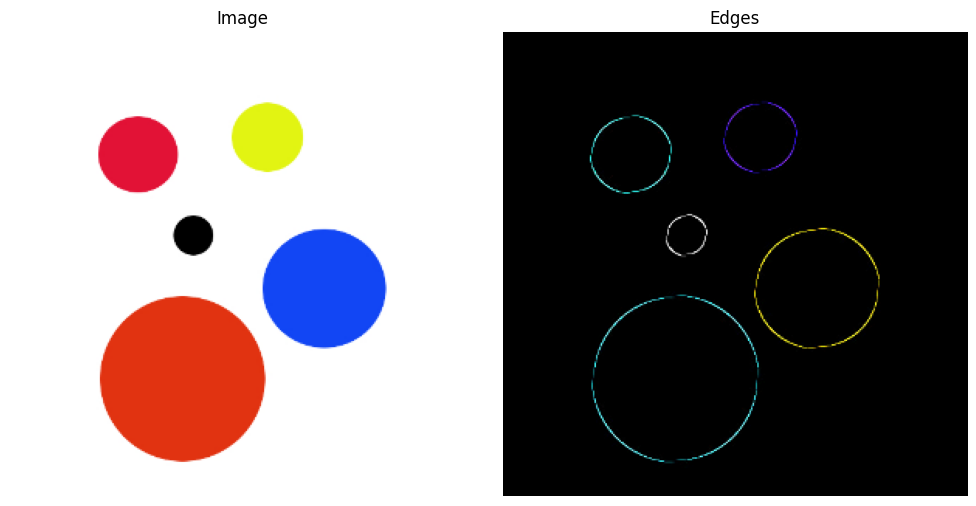

In [8]:
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

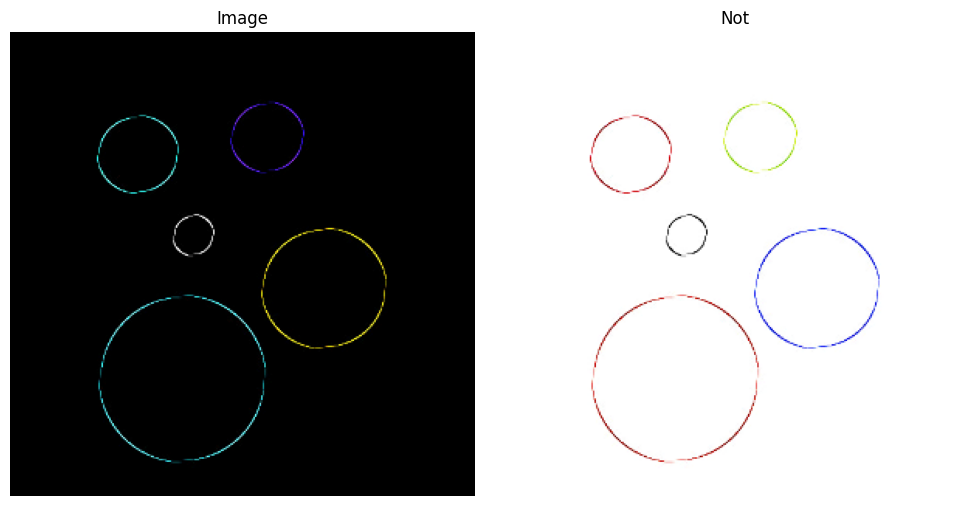

In [9]:
n = cv2.bitwise_not(new)
r.show_multiple_images(images=(new, n), titles=('Image', 'Not'), cols=2)

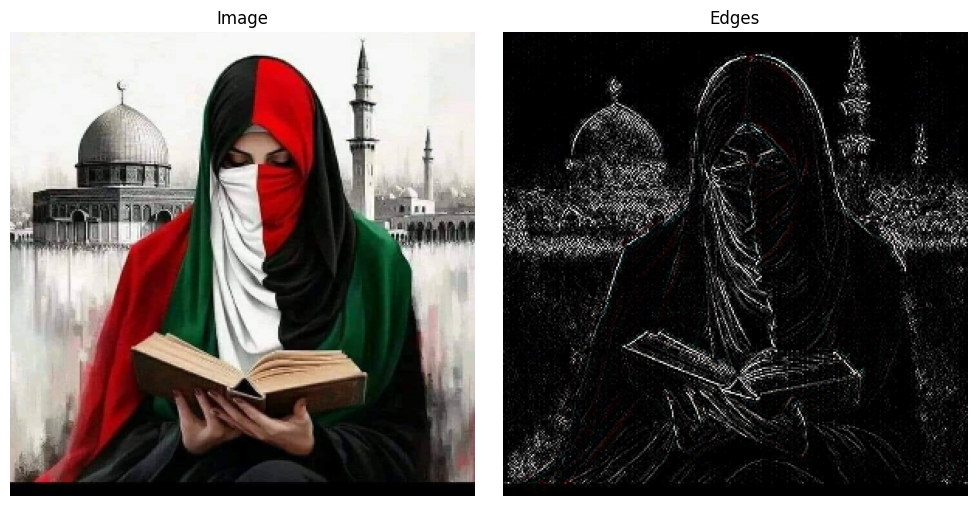

In [10]:
img = r.load_image('1.jpg')
new = cv2.Sobel(img, ddepth=-1, dx=1, dy=1, ksize=3, scale=6, delta=0, borderType=cv2.BORDER_DEFAULT)
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

##### Summary of Parameters for `cv2.Sobel()`

| **Parameter**   | **Description**                                                                                  |
|-----------------|--------------------------------------------------------------------------------------------------|
| `src`           | The input image (grayscale, single-channel).                                                     |
| `ddepth`        | The depth of the output image. Set to `-1` for the same depth as the input image, or specify one of the following: `CV_8U`, `CV_16S`, `CV_32F`, `CV_64F`. |
| `dx`            | The order of the derivative in the x-direction. Set to `1` for the first derivative (edges in x-direction). |
| `dy`            | The order of the derivative in the y-direction. Set to `1` for the first derivative (edges in y-direction). |
| `ksize`         | The size of the Sobel kernel. Typical values are `1`, `3`, `5`, or `7`. Larger values provide smoother edges but may lose details. |
| `scale`         | A scaling factor applied to the result (default is `1`).                                           |
| `delta`         | A value added to the result (default is `0`).                                                     |
| `borderType`    | Specifies how the borders of the image are handled (default is `cv2.BORDER_DEFAULT`). Common options include `cv2.BORDER_REPLICATE`, `cv2.BORDER_REFLECT`, etc. |


## 04. `cv2.HoughLines()` Function for Line Detection


The `cv2.HoughLines()` function in OpenCV is used to detect straight lines in an image using the **Hough Transform**. It detects lines by transforming points in the image space to parameter space and identifying points that form straight lines.
#
### Explanation of Parameters

- **`image`** (`numpy.ndarray`):  
  The input image in which lines are to be detected. It should be a binary image (edges detected, e.g., using Canny).

- **`rho`** (`float`):  
  The resolution of the accumulator in pixels. It represents the distance resolution of the parameter space in pixels. Commonly, this value is set to 1.

- **`theta`** (`float`):  
  The angle resolution of the accumulator in radians. Typically, this is set to `np.pi / 180` (1 degree).

- **`threshold`** (`int`):  
  The minimum number of intersections in the Hough space to detect a line. This is the "voting" threshold, where points (lines) are considered detected if their value exceeds t#### threshold.

### Output

- **Returns**:  
  The function returns a list of detected lines, represented as `(rho, theta)` pairs. Each line is described by its distance from the origin (`rho`) and i####angle (`theta`).

### Summary

- **`rho`**: Defines the resolution in the distance direction. Usually set to 1 pixel.
- **`theta`**: Defines the resolution in the angle direction. Commonly set to `np.pi / 180` (1 degree).
- **`threshold`**: Controls the sensitivity of the detection. Higher values make the detection more s####ctive (fewer lines).
  
### When to Use `cv2.HoughLines()`

`cv2.HoughLines()` is useful for detecting straight lines in images, particularly when:
- You have a clear edge image (such as after using Canny edge detection).
- You need to detect simple, straight structures like roads, borders, or object boundaries in images.


								Detect Edges


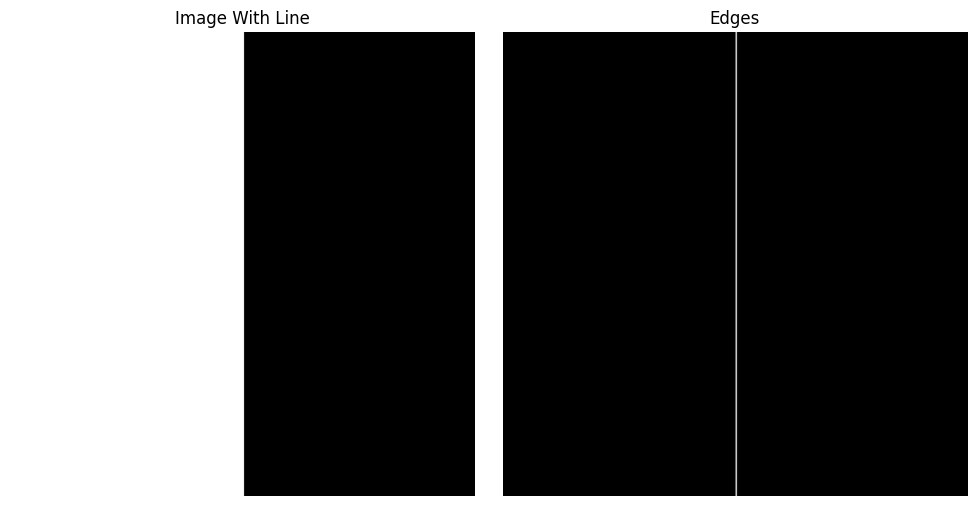

In [11]:
img = r.load_image('1bit1.png')
new = cv2.Canny(img, 100, 230) # Here we detect edges
print("\t\t\t\t\t\t\t\tDetect Edges")
r.show_multiple_images(images=(img, new), titles=('Image With Line', 'Edges'), cols=2)

In [12]:
# Define parameters for HoughLinesP
min_line_length = 10  # Minimum length of a line
max_line_gap = 5     # Maximum allowed gap between line segments
lines = cv2.HoughLinesP(new, 3, np.pi / 180, 30, minLineLength=min_line_length, maxLineGap=max_line_gap)

In [13]:
# Draw detected lines on the original image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (120, 255, 10), 4)  # Green lines

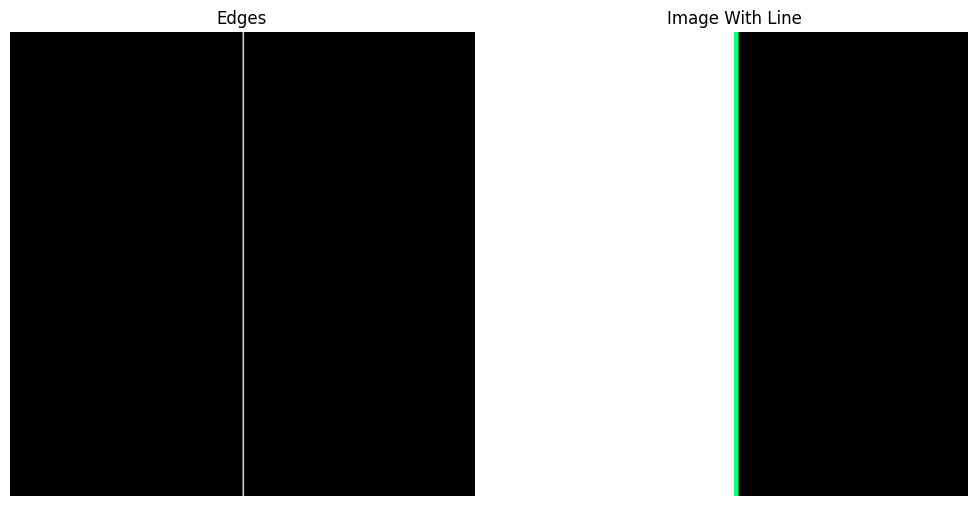

In [14]:
r.show_multiple_images(images=(new, img), titles=('Edges', 'Image With Line'), cols=2)

#### Summary

| **Feature**                     | **cv2.HoughLines()**                | **cv2.HoughLinesP()**                |
|----------------------------------|-------------------------------------|--------------------------------------|
| **Line Type**                    | Infinite lines                      | Line segments (finite lines)        |
| **Output**                       | Polar coordinates (rho, theta)      | Cartesian coordinates (x1, y1, x2, y2) |
| **Efficiency**                   | Less efficient                      | More efficient, especially for broken lines |
| **Use Case**                     | Continuous lines (e.g., roads, tracks) | Fragmented or broken lines (e.g., lanes) |
| **Parameters**                   | rho, theta, threshold               | rho, theta, threshold, minLineLength, maxLineGap |


## 05. `cv2.Scharr()` - Scharr Gradient Operator

The `cv2.Scharr()` function in OpenCV is used to compute the gradient of an image, which is helpful for edge detection and image analysis. It applies the Scharr operator, a more advanced version of the Sobel operator, to detect edges by computing the derivative of an image along the x and y axes.

#### Explanation of Parameters

- **`src`** (`numpy.ndarray`):  
  The input image on which the Scharr operator is applied. It should be a grayscale image, where pixel intensity values represent different features of the image.

- **`ddepth`** (`int`):  
  The depth of the output image. This determines the type of the output image (e.g., `cv2.CV_8U`, `cv2.CV_32F`, etc.). It can be `-1` to use the same depth as the input image.

- **`dx`** (`int`):  
  The order of the derivative in the x direction. If `dx=1`, the function calculates the gradient in the x direction (horizontal edges). If `dx=0`, no derivative is computed in the x direction.

- **`dy`** (`int`):  
  The order of the derivative in the y direction. If `dy=1`, the function calculates the gradient in the y direction (vertical edges). If `dy=0`, no derivative is computed in the y direction.

- **`ksize`** (`int`):  
  The size of the Scharr kernel. This is typically `3`, as it is the most common choice, but higher values can be used to get more detailed gradients.

- **`scale`** (`float`, optional):  
  A scaling factor that is applied to the computed derivative values. The default is `1`.

- **`delta`** (`float`, optional):  
  A value that is added to the result of the convolution. It helps shift the values of the output image. Default is `0`.

#### Output

- **Returns**:  
  The function returns an image representing the gradient of the input image in either the x or y direction, depending on the values of `dx` and `dy`. This output image highlights edges or changes in intensity within the image.

#### Summary

- **`dx`** and **`dy`**: Define the order of derivatives in the x and y directions, respectively. The combination of these values determines the edge detection orientation.
- **`ksize`**: Controls the kernel size, affecting the smoothness and strength of the edges.
- **`scale`**: Adjusts the magnitude of the gradient (often left as `1`).
- **`delta`**: A value added to the result for shifting the output (usually `0`).

#### When to Use `cv2.Scharr()`

`cv2.Scharr()` is especially useful when:
- You need to detect edges in an image, with an improved edge detection capability compared to basic Sobel operators.
- You want to highlight transitions or changes in intensity within an image, such as in object recognition, image segmentation, and feature extraction tasks.
- The edges are noisy or weak and require more precise detection than what the Sobel operator can offer.

The Scharr operator is particularly effective for applications in which detecting finer or more accurate edge details is important.

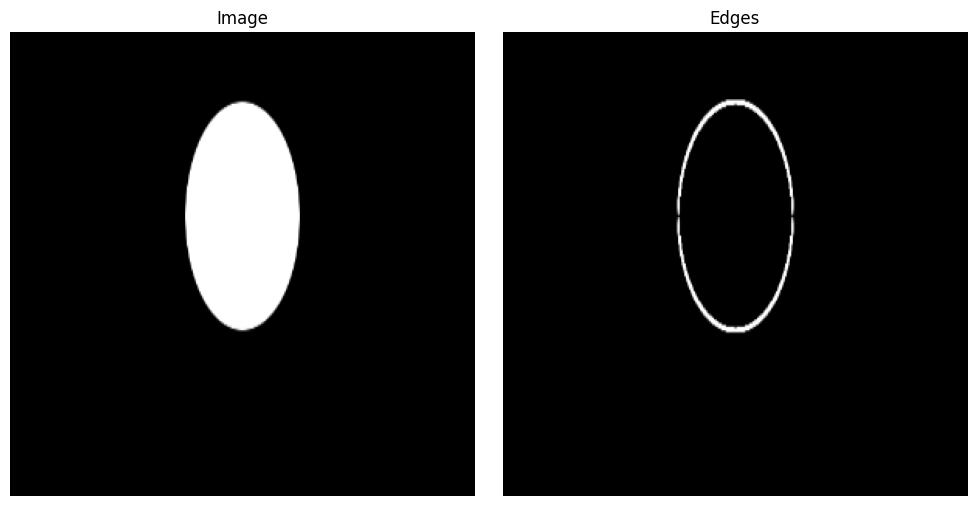

In [15]:
# Load the image
img = r.load_image('2bit2.png')

# Apply Scharr operator to find edges in the x-direction
scharr_x = cv2.Scharr(img, ddepth=cv2.CV_32F, dx=0, dy=1)

# Apply Scharr operator to find edges in the y-direction
scharr_y = cv2.Scharr(img, ddepth=cv2.CV_32F, dx=0, dy=1)

# Combine the x and y derivatives to get the overall gradient
gradient = cv2.magnitude(scharr_x, scharr_y)

# Clip the gradient to the range [0, 255]
gradient = np.clip(gradient, 0, 255)

# Convert the gradient to uint8 for display
gradient = gradient.astype(np.uint8)

# Show the results
r.show_multiple_images(images=(img, gradient), titles=('Image', 'Edges'), cols=2)

#### Summary of Parameters for `cv2.Scharr()`

| **Parameter**   | **Description**                                                                                  |
|-----------------|--------------------------------------------------------------------------------------------------|
| `src`           | The input image (grayscale, single-channel).                                                     |
| `ddepth`        | The depth of the output image. Set to `-1` for the same depth as the input image.                 |
| `dx`            | The order of the derivative in the x-direction. Set to `1` for detecting edges in the x-direction.|
| `dy`            | The order of the derivative in the y-direction. Set to `1` for detecting edges in the y-direction.|
| `scale`         | A scaling factor applied to the result (default is `1`).                                          |
| `delta`         | A value added to the result (default is `0`).                                                     |
| `borderType`    | Specifies how the borders of the image are handled (default is `cv2.BORDER_DEFAULT`).            |


## 06 `cv2.Laplacian()` - Laplacian Edge Detection


The `cv2.Laplacian()` function in OpenCV is used to detect edges in an image by computing the Laplacian of the image. The Laplacian operator calculates the second-order derivative of the image, highlighting regions where the intensity changes sharply, which typically correspond to edges.

#### Explanation of Parameters

- **`src`** (`numpy.ndarray`):  
  The input image in which edges are to be detected. It should be a grayscale image, where pixel intensity values represent different features of the image.

- **`ddepth`** (`int`):  
  The depth of the output image. This parameter determines the type of the output image (e.g., `cv2.CV_8U`, `cv2.CV_32F`, etc.). A common value is `cv2.CV_64F` for the output depth, but `-1` can be used to keep the same depth as the input.

- **`ksize`** (`int`):  
  The size of the kernel used for the Laplacian calculation. This parameter controls the size of the kernel used to compute the second derivative. It is typically set to `3` or `5`, as these are commonly used values.

- **`scale`** (`float`, optional):  
  A scaling factor that is applied to the computed Laplacian values. The default is `1`.

- **`delta`** (`float`, optional):  
  A value that is added to the result of the convolution. The default is `0`.

#### Output

- **Returns**:  
  The function returns an image representing the Laplacian of the input image. This output image highlights areas of rapid intensity change, typically corresponding to edges.

#### Summary

- **`ddepth`**: Specifies the depth of the output image (e.g., `cv2.CV_8U`, `cv2.CV_32F`).
- **`ksize`**: Defines the size of the kernel used to compute the second-order derivative.
- **`scale`**: A factor applied to the Laplacian values, typically left as `1`.
- **`delta`**: An optional value added to the result, often set to `0`.

#### When to Use `cv2.Laplacian()`

`cv2.Laplacian()` is useful when:
- You want to detect edges or rapid intensity changes in an image.
- You need to highlight the transitions between light and dark regions in an image, such as for edge detection, image segmentation, or feature extraction.
- The image has noise or weak edges that require more refined detection techniques, as the Laplacian operator is sensitive to intensity variations in all directions.

This operator is especially effective when the edges in an image are not aligned with the horizontal or vertical axes and can be detected in all directions (diagonal, vertical, or horizontal).


In [16]:
img = r.load_image('Picture1.jpg')
new = cv2.Laplacian(src=img, ddepth=-1, ksize=5, scale=3, delta=0.4, borderType=cv2.BORDER_DEFAULT)

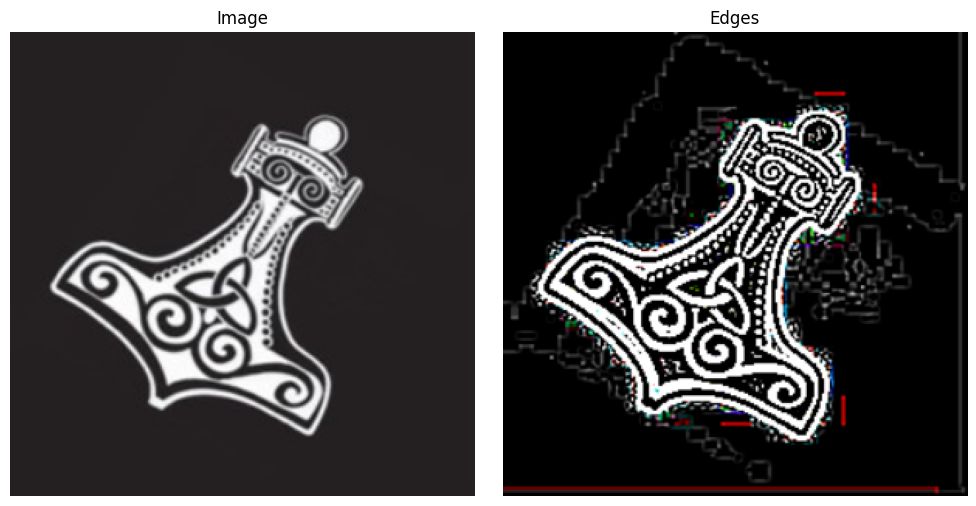

In [17]:
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

In [18]:
img = r.load_image('2bit2.png')
new = cv2.Laplacian(src=img, ddepth=-1, ksize=5, scale=3, delta=0.4, borderType=cv2.BORDER_DEFAULT)

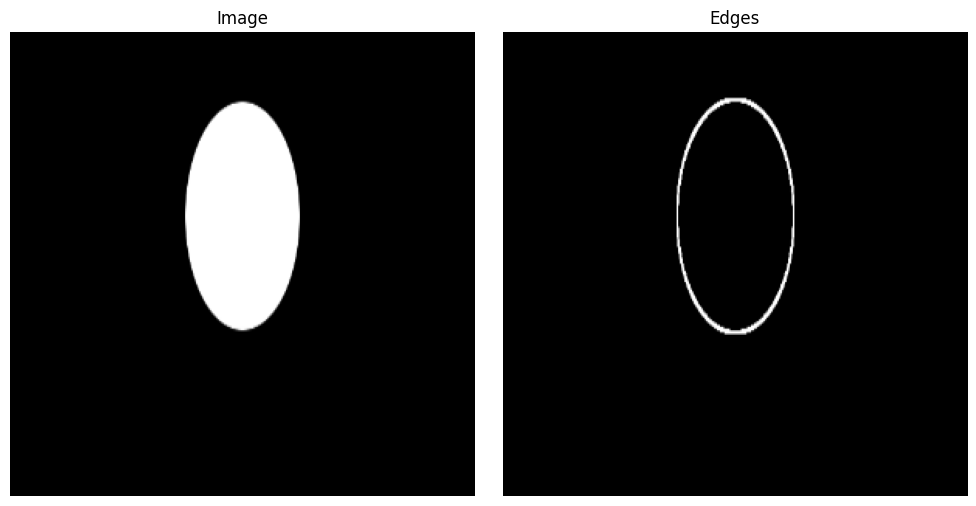

In [19]:
r.show_multiple_images(images=(img, new), titles=('Image', 'Edges'), cols=2)

##### Summary of Parameters for `cv2.Laplacian()`

| **Parameter**   | **Description**                                                                                              |
|-----------------|--------------------------------------------------------------------------------------------------------------|
| `src`           | The input image (grayscale, single-channel).                                                                 |
| `ddepth`        | The depth of the output image. Set to `-1` for the same depth as the input image or specify a depth such as `CV_8U`, `CV_16S`, `CV_32F`, or `CV_64F`. |
| `ksize`         | The size of the Sobel kernel used for computing the Laplacian. Typical values are `1`, `3`, `5`, or `7`. Larger values will smooth the image more but may reduce edge detail. |
| `scale`         | A scaling factor applied to the result (default is `1`). It is used to scale the Laplacian result.            |
| `delta`         | A value added to the result (default is `0`). It allows you to add an offset to the Laplacian values.        |
| `borderType`    | Specifies how the borders of the image are handled (default is `cv2.BORDER_DEFAULT`). Common options include `cv2.BORDER_REPLICATE`, `cv2.BORDER_REFLECT`, etc. |


## 07. `cv2.filter2D()` - Apply an Arbitrary Filter to an Image

The `cv2.filter2D()` function in OpenCV is used to apply a custom kernel (convolution matrix) to an image. It allows for the convolution of an image with a user-defined kernel, enabling various types of image processing operations, such as blurring, sharpening, edge detection, and more.

#### Explanation of Parameters

- **`src`** (`numpy.ndarray`):  
  The input image on which the filter is to be applied. It can be a grayscale or color image, depending on the operation you intend to perform.

- **`ddepth`** (`int`):  
  The depth of the output image. This parameter defines the data type of the resulting image. Common values are:
  - `-1` to use the same depth as the input image.
  - `cv2.CV_8U` for an 8-bit unsigned integer depth.
  - `cv2.CV_32F` for a 32-bit floating point depth, among others.

- **`kernel`** (`numpy.ndarray`):  
  The convolution kernel or filter. This is a user-defined matrix (2D array) that is used to perform the convolution operation. The kernel determines the type of filtering effect applied to the image, such as sharpening or blurring.

- **`anchor`** (`tuple`, optional):  
  The anchor point within the kernel. This defines the position of the kernel’s center during the convolution. By default, it is set to `(-1, -1)`, meaning the center of the kernel is used as the anchor point.

- **`borderType`** (`int`, optional):  
  Specifies how the borders of the image are handled during convolution. Common values include:
  - `cv2.BORDER_CONSTANT`: Extend the border with a constant value (default is 0).
  - `cv2.BORDER_REFLECT`: Reflect the image pixels at the border.
  - `cv2.BORDER_REPLICATE`: Repeat the border pixel values.

#### Output

- **Returns**:  
  The function returns the filtered image, where the filter (kernel) has been applied. The output image may have enhanced or suppressed features depending on the kernel used.

#### Summary

- **`ddepth`**: Specifies the depth (data type) of the output image.
- **`kernel`**: The filter (convolution matrix) applied to the input image. This matrix controls the effect of the filter (e.g., blurring, sharpening).
- **`anchor`**: Determines the kernel’s reference point for convolution (typically the center).
- **`borderType`**: Defines how borders are treated during convolution (e.g., constant, reflect, replicate).

#### When to Use `cv2.filter2D()`

`cv2.filter2D()` is useful when:
- You want to apply a custom filter to an image, such as blurring, sharpening, edge detection, or custom image transformations.
- You need precise control over the filter kernel and its effect on the image.
- You want to apply more advanced filters that are not built into other OpenCV functions, such as non-linear filters or specific mathematical operations.

This function is highly versatile and can be used in a wide range of image processing applications, including:
- **Image smoothing** (using a blurring kernel),
- **Edge detection** (using kernels like Sobel or Laplacian),
- **Sharpening** (using a sharpening kernel),
- **Custom operations** by designing your own kernel.


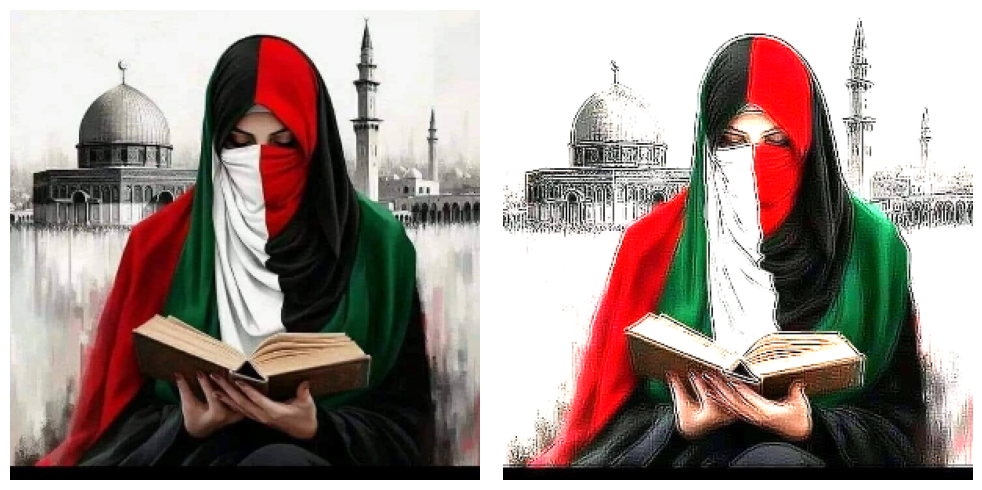

In [39]:
kernal = np.array([[ 0,  0,  1,  0,  0],
                   [ 0,  1,  2,  1,  0],
                   [ 1,  2, -16,  2,  1],
                   [ 0,  1,  2,  1,  0],
                   [ 0,  0,  1,  0,  0]])
img = r.load_image('1.jpg')
img1 = cv2.filter2D(img,ddepth=-1, kernel=kernel)
r.show_multiple_images((img,img1), cols=2)

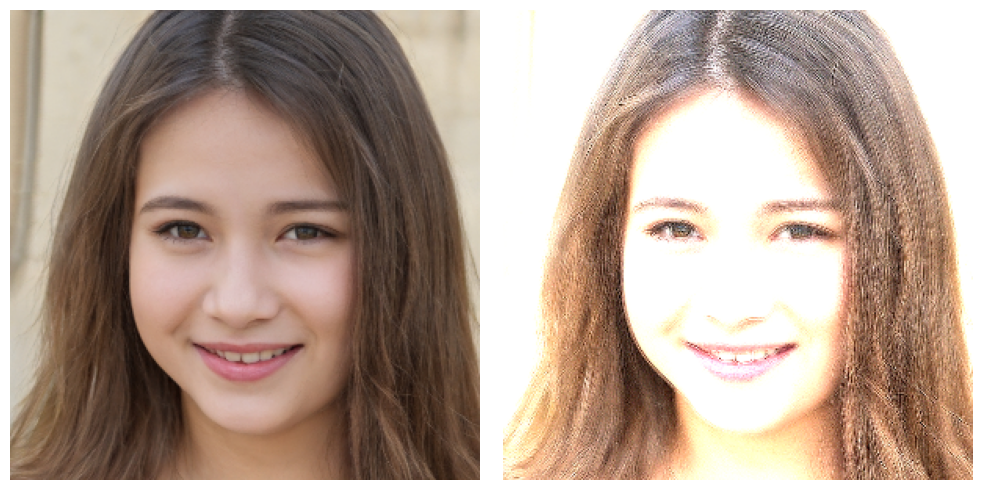

In [41]:
img = r.load_image('img5.jpg')
img1 = cv2.filter2D(img,ddepth=-1, kernel=kernel)
r.show_multiple_images((img,img1), cols=2)